# **Acknowledgements**
[Penn State University - Stat 501 : Regression Methods Course](https://online.stat.psu.edu/stat501/lesson/r-help-1-simple-linear-regression)

**Please navigate to Runtime -> Change runtime type and select R.**

In [1]:
cat(system('python3 -c "from google.colab import drive\ndrive.mount()"', intern=TRUE), sep='\n', wait=TRUE)

Warning message in system("python3 -c \"from google.colab import drive\ndrive.mount()\"", :
“running command 'python3 -c "from google.colab import drive
drive.mount()"' had status 1”



TRUE


# **Temperature**
* Create the temperature data and produce a scatterplot with points and lines:

[1]  0  5 10 15 20 25 30 35 40 45 50

[1]  32  41  50  59  68  77  86  95 104 113 122

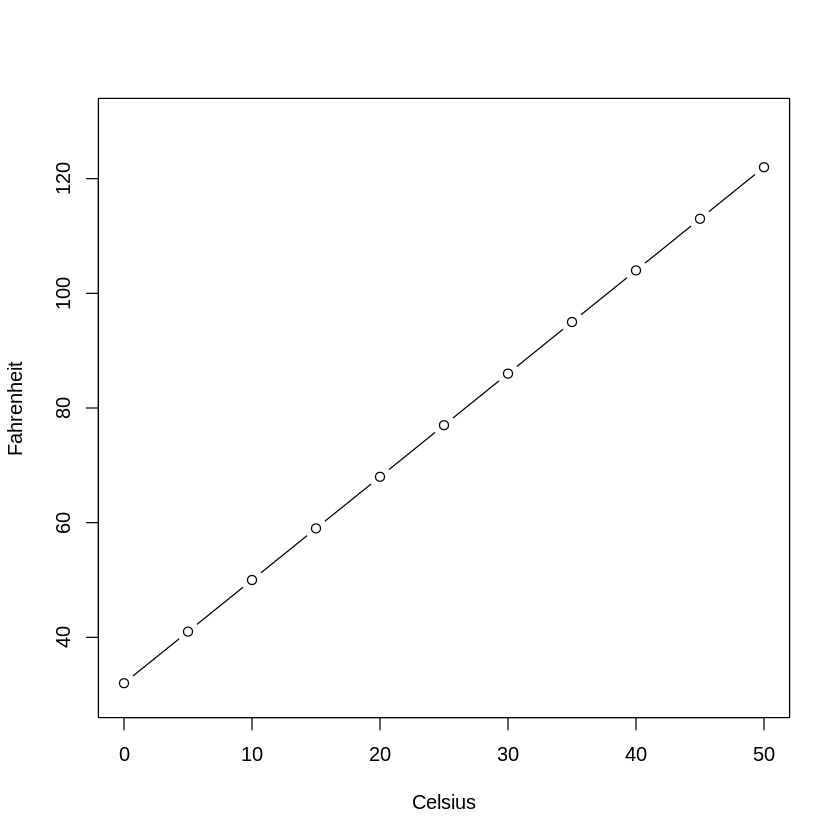

In [2]:
C <- seq(0, 50, by=5)
F <- (9/5)*C+32
plot(C, F, type="b", xlab="Celsius", ylab="Fahrenheit", ylim=c(30,130))

# **Skin cancer**
* Load the skin cancer data and produce a scatterplot with a simple linear regression line:

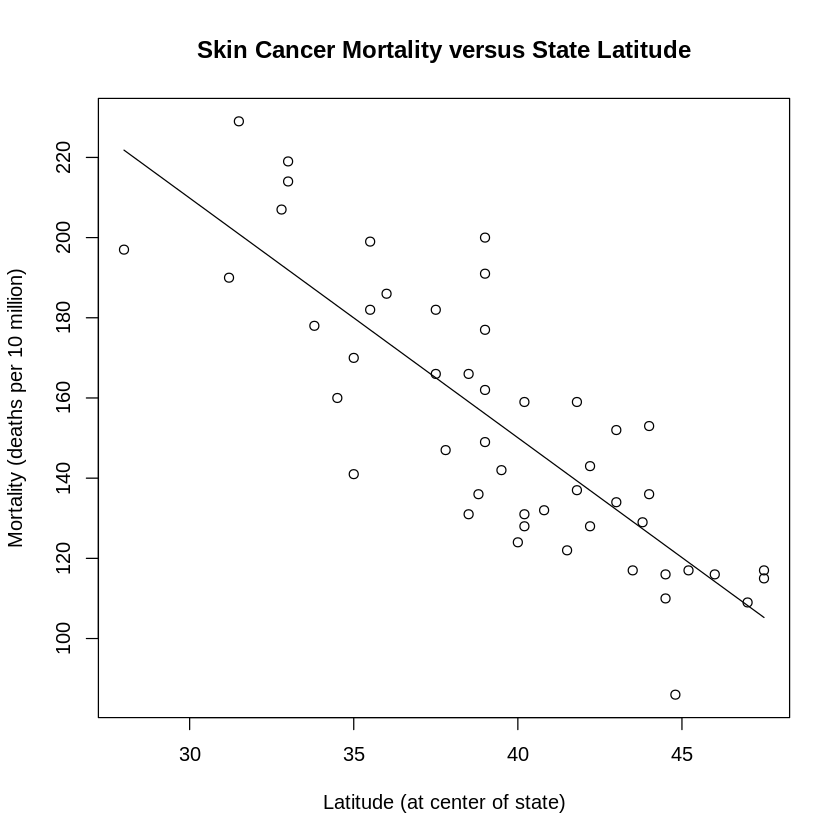

In [3]:
skincancer <- read.table("skincancer.txt", header=T)
attach(skincancer)
model <- lm(Mort ~ Lat)
plot(x=Lat, y=Mort,
     xlab="Latitude (at center of state)", ylab="Mortality (deaths per 10 million)",
     main="Skin Cancer Mortality versus State Latitude",
     panel.last = lines(sort(Lat), fitted(model)[order(Lat)]))
detach(skincancer)

# **Student height and weight**
* Load the student height and weight data.
* Fit a simple linear regression model.
* Produce a scatterplot with a simple linear regression line and another line with specified intercept and slope.
* Calculate sum of squared errors (SSE).
* Predict weight for height=66 and height=67.


Call:
lm(formula = wt ~ ht)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.2339  -4.0804  -0.0963   4.6445  14.2158 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -266.5344    51.0320  -5.223    8e-04 ***
ht             6.1376     0.7353   8.347 3.21e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.641 on 8 degrees of freedom
Multiple R-squared:  0.897,	Adjusted R-squared:  0.8841 
F-statistic: 69.67 on 1 and 8 DF,  p-value: 3.214e-05


[1] 597.386

1        2 
138.5460 144.6836

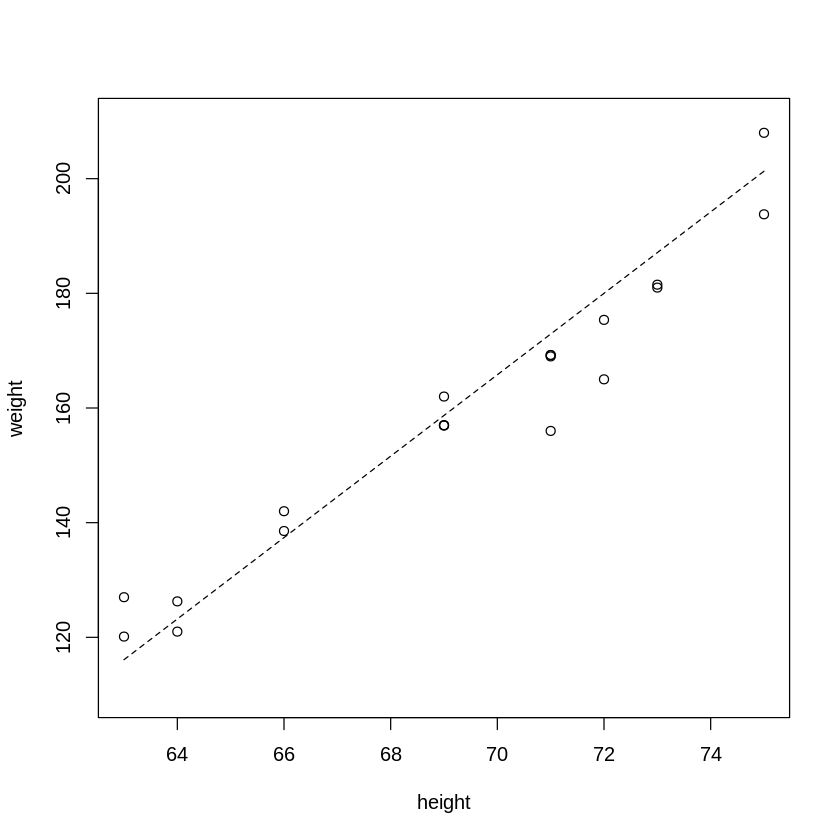

In [5]:
heightweight <- read.table("student_height_weight.txt", header=T)
attach(heightweight)

model <- lm(wt ~ ht)
summary(model)
# Hashtag denotes comments
# Coefficients:
#              Estimate Std. Error t value Pr(>|t|)
# (Intercept) -266.5344    51.0320  -5.223    8e-04 ***
# ht             6.1376     0.7353   8.347 3.21e-05 ***

plot(x=ht, y=wt, ylim=c(110,210), xlab="height", ylab="weight",
     panel.last = c(lines(sort(ht), fitted(model[order(ht)]),
                    lines(ht, -331.2+7.1*ht, lty=2))))
sum(residuals(model)^2) # SSE = 597.386
predict(model, newdata=data.frame(ht=c(66, 67))) # 138.5460 144.6836
detach(heightweight)

# **High school GPA and college test scores**
* Generate the high school GPA and college test score (population) data.
* Produce a scatterplot of the population data with the population regression line.
* Sample the data (your results will differ since we're randomly sampling here).
* Produce a scatterplot of the sample data with a simple linear regression line and the the population regression line.
* Calculate sum of squared errors (SSE), mean square error (MSE), and regression (or residual) standard error (S).

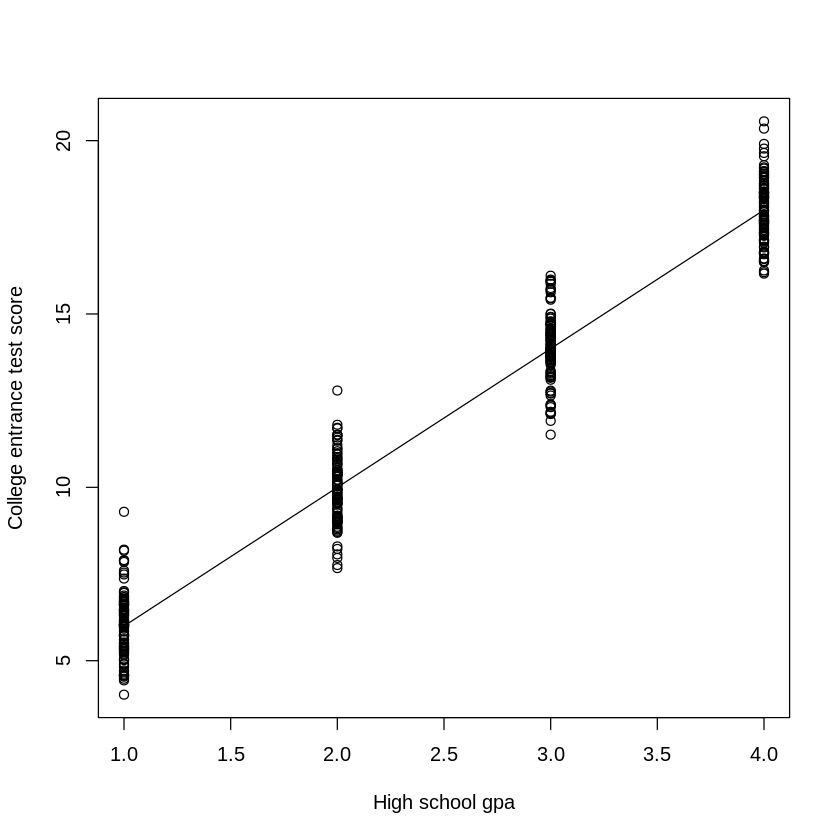

[1] 9.100275

[1] 0.9100275

[1] 0.9539536


Call:
lm(formula = Ys ~ Xs)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9358 -0.3494  0.1779  0.5503  1.1637 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.2420     0.6745   1.841   0.0954 .  
Xs            4.3354     0.2463  17.602 7.45e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.954 on 10 degrees of freedom
Multiple R-squared:  0.9687,	Adjusted R-squared:  0.9656 
F-statistic: 309.8 on 1 and 10 DF,  p-value: 7.453e-09


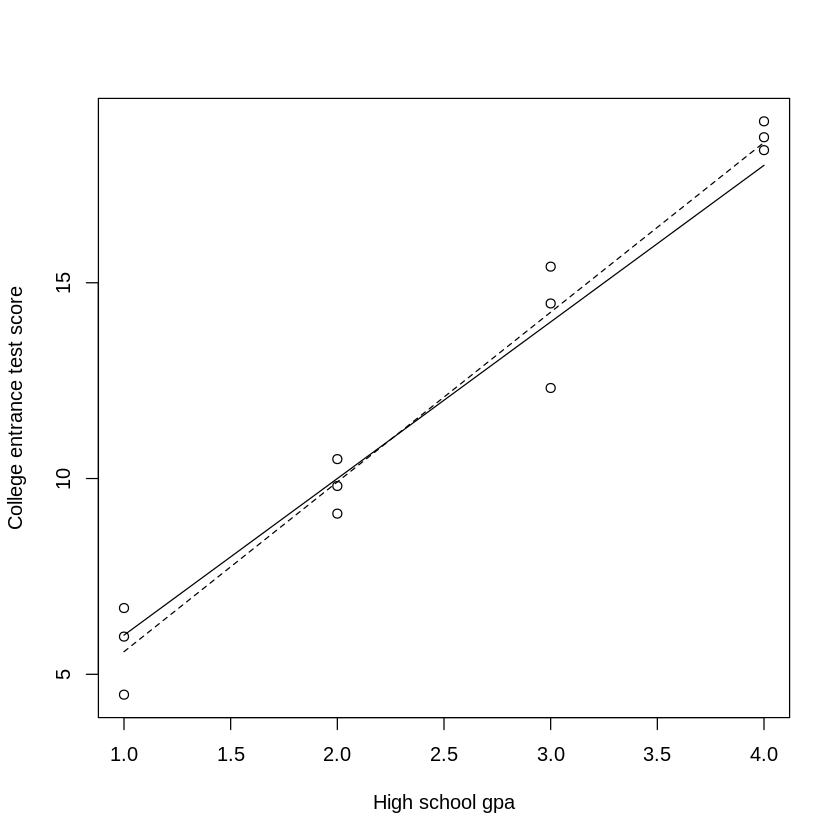

In [6]:
X <- c(rep(1, 100), rep(2, 100), rep(3, 100), rep(4, 100))
Y <- 2 + 4*X + rnorm(400, 0, 1)
plot(X, Y, xlab="High school gpa", ylab="College entrance test score",
     panel.last = lines(X, 2+4*X))
Xs <- c(rep(1, 3), rep(2, 3), rep(3, 3), rep(4, 3))
Ys <- Y[c(rep(0, 3), rep(100, 3), rep(200, 3), rep(300, 3)) + sample.int(100, 12)]
model <- lm(Ys ~ Xs)
plot(Xs, Ys, xlab="High school gpa", ylab="College entrance test score",
     panel.last = c(lines(Xs, 2+4*Xs),
                    lines(sort(Xs), fitted(model[order(Xs)]),lty=2)))
sum(residuals(model)^2) # SSE = 8.677833
sum(residuals(model)^2)/10 # MSE = 0.8677833
sqrt(sum(residuals(model)^2)/10) # S = 0.9315489
summary(model) # Residual standard error: 0.9315 on 10 degrees of freedom

# **Skin cancer**
* Load the skin cancer data.
* Fit a simple linear regression model with y = Mort and x = Lat and display the coefficient of determination.
* Calculate the correlation between Mort and Lat.

In [7]:
skincancer <- read.table("skincancer.txt", header=T)
attach(skincancer)
model <- lm(Mort ~ Lat)
summary(model) # Multiple R-squared:  0.6798
cor(Mort, Lat) # correlation = -0.8245178
detach(skincancer)


Call:
lm(formula = Mort ~ Lat)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.972 -13.185   0.972  12.006  43.938 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 389.1894    23.8123   16.34  < 2e-16 ***
Lat          -5.9776     0.5984   -9.99 3.31e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.12 on 47 degrees of freedom
Multiple R-squared:  0.6798,	Adjusted R-squared:  0.673 
F-statistic:  99.8 on 1 and 47 DF,  p-value: 3.309e-13


[1] -0.8245178

# **Temperature**
* Create the temperature data.
* Fit a simple linear regression model with y = F and x = C and display the coefficient of determination
* Calculate the correlation between F and C.

In [8]:
C <- seq(0, 50, by=5)
F <- (9/5)*C+32
model <- lm(F ~ C)
summary(model) # Multiple R-squared:      1
cor(F, C) # correlation = 1

Warning message in summary.lm(model):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = F ~ C)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.509e-14 -1.580e-16  2.723e-16  1.628e-15  1.180e-14 

Coefficients:
             Estimate Std. Error   t value Pr(>|t|)    
(Intercept) 3.200e+01  3.714e-15 8.616e+15   <2e-16 ***
C           1.800e+00  1.256e-16 1.434e+16   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.584e-15 on 9 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 2.055e+32 on 1 and 9 DF,  p-value: < 2.2e-16


[1] 1

# **Building stories**
* Load the building stories data.
* Fit a simple linear regression model with y = Height and x = Stories and display the coefficient of determination.
* Calculate the correlation between Height and Stories.

In [9]:
bldgstories <- read.table("bldgstories.txt", header=T)
attach(bldgstories)
model <- lm(HGHT ~ STORIES)
summary(model) # Multiple R-squared:  0.9036
cor(HGHT, STORIES) # correlation = 0.9505549
detach(bldgstories)


Call:
lm(formula = HGHT ~ STORIES)

Residuals:
     Min       1Q   Median       3Q      Max 
-156.759  -33.239    5.995   28.450  167.487 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  90.3096    20.9622   4.308 6.44e-05 ***
STORIES      11.2924     0.4844  23.310  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 58.33 on 58 degrees of freedom
Multiple R-squared:  0.9036,	Adjusted R-squared:  0.9019 
F-statistic: 543.4 on 1 and 58 DF,  p-value: < 2.2e-16


[1] 0.9505549

# **Driver's age and distance**
* Load the driver's age and distance data.
* Fit a simple linear regression model with y = Distance and x = Age and display the coefficient of determination.
* Calculate the correlation between Distance and Age.

In [10]:
signdist <- read.table("signdist.txt", header=T)
attach(signdist)
model <- lm(Distance ~ Age)
summary(model) # Multiple R-squared:  0.642
cor(Distance, Age) # correlation = -0.8012447
detach(signdist)


Call:
lm(formula = Distance ~ Age)

Residuals:
    Min      1Q  Median      3Q     Max 
-78.231 -41.710   7.646  33.552 108.831 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 576.6819    23.4709  24.570  < 2e-16 ***
Age          -3.0068     0.4243  -7.086 1.04e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 49.76 on 28 degrees of freedom
Multiple R-squared:  0.642,	Adjusted R-squared:  0.6292 
F-statistic: 50.21 on 1 and 28 DF,  p-value: 1.041e-07


[1] -0.8012447

# **Student's height and GPA**
* Load the student's height and GPA data.
* Fit a simple linear regression model with y = GPA and x = Height and display the coefficient of determination.
* Calculate the correlation between GPA and Height.

In [11]:
heightgpa <- read.table("heightgpa.txt", header=T)
attach(heightgpa)
model <- lm(gpa ~ height)
summary(model) # Multiple R-squared:  0.002835
cor(gpa, height) # correlation = -0.05324126
detach(heightgpa)


Call:
lm(formula = gpa ~ height)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.45081 -0.24878  0.00325  0.35622  0.90263 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  3.410214   1.434616   2.377   0.0234 *
height      -0.006563   0.021428  -0.306   0.7613  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5423 on 33 degrees of freedom
Multiple R-squared:  0.002835,	Adjusted R-squared:  -0.02738 
F-statistic: 0.09381 on 1 and 33 DF,  p-value: 0.7613


[1] -0.05324126

# **Teen birth rate and poverty**
* Load the teen birth rate and poverty data.
* Fit a simple linear regression model with y = Brth15to17 and x = PovPct and display the model results.
* Produce a scatterplot with a simple linear regression line.


Call:
lm(formula = Brth15to17 ~ PovPct)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2275  -3.6554  -0.0407   2.4972  10.5152 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.2673     2.5297   1.687    0.098 .  
PovPct        1.3733     0.1835   7.483 1.19e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.551 on 49 degrees of freedom
Multiple R-squared:  0.5333,	Adjusted R-squared:  0.5238 
F-statistic:    56 on 1 and 49 DF,  p-value: 1.188e-09


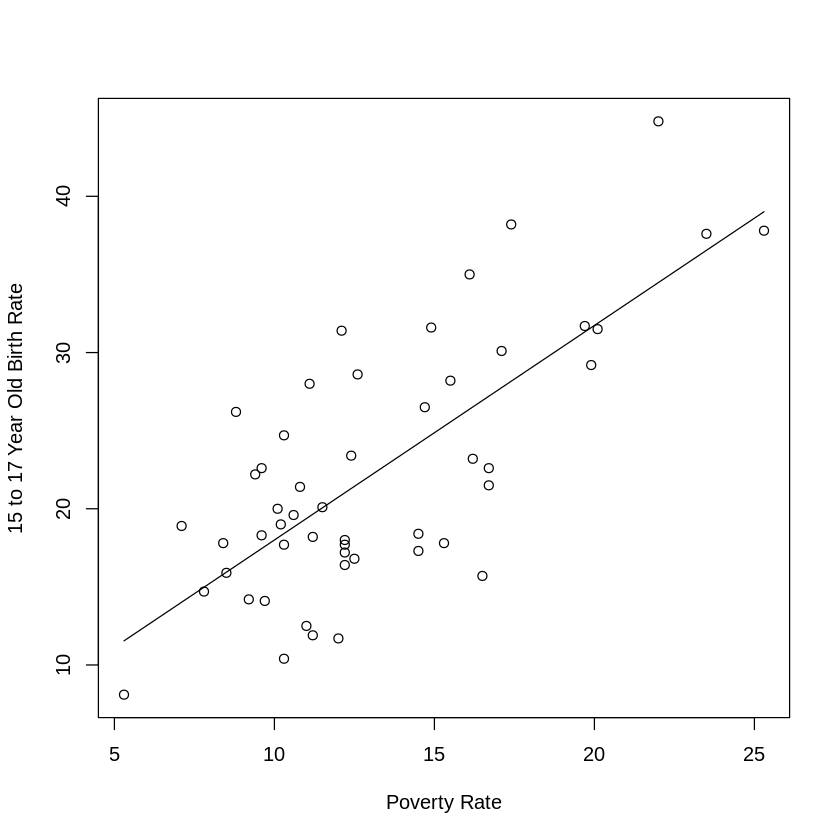

In [13]:
poverty <- read.table("poverty.txt", header=T)
attach(poverty)

model <- lm(Brth15to17 ~ PovPct)
summary(model)
# Coefficients:
#             Estimate Std. Error t value Pr(>|t|)
# (Intercept)   4.2673     2.5297   1.687    0.098 .
# PovPct        1.3733     0.1835   7.483 1.19e-09 ***
# ---
# Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
#
# Residual standard error: 5.551 on 49 degrees of freedom
# Multiple R-squared:  0.5333,  Adjusted R-squared:  0.5238

plot(PovPct, Brth15to17, xlab="Poverty Rate", ylab="15 to 17 Year Old Birth Rate",
     panel.last = lines(sort(PovPct), fitted(model)[order(PovPct)]))
detach(poverty)

# **Lung function**
* Load the lung function data.
* Fit a simple linear regression model with y = FEV and x = age for ages 6-10 only and display the model results.
* Produce a scatterplot for ages 6-10 only with a simple linear regression line.
* Fit a simple linear regression model with y = FEV and x = age for the full dataset and display the model results.
* Produce a scatterplot for the full dataset with a simple linear regression line.


Call:
lm(formula = FEV ~ age, subset = age >= 6 & age <= 10)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.22576 -0.28855 -0.00534  0.27106  1.90724 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.01165    0.15237   0.076    0.939    
age          0.26721    0.01801  14.839   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4312 on 349 degrees of freedom
Multiple R-squared:  0.3869,	Adjusted R-squared:  0.3851 
F-statistic: 220.2 on 1 and 349 DF,  p-value: < 2.2e-16



Call:
lm(formula = FEV ~ age)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.57539 -0.34567 -0.04989  0.32124  2.12786 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.431648   0.077895   5.541 4.36e-08 ***
age         0.222041   0.007518  29.533  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5675 on 652 degrees of freedom
Multiple R-squared:  0.5722,	Adjusted R-squared:  0.5716 
F-statistic: 872.2 on 1 and 652 DF,  p-value: < 2.2e-16


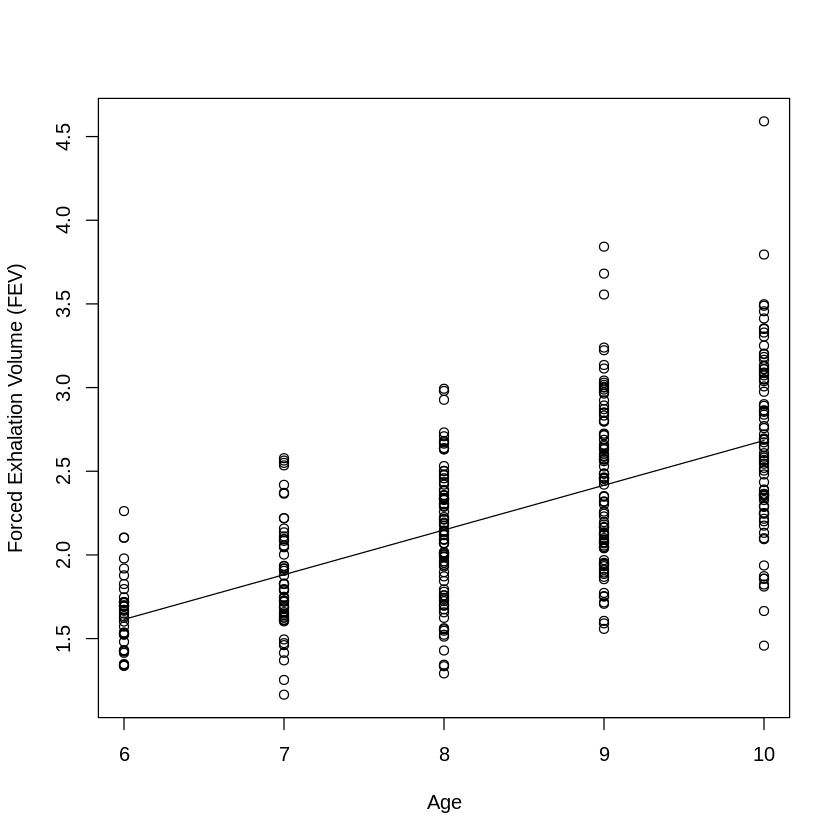

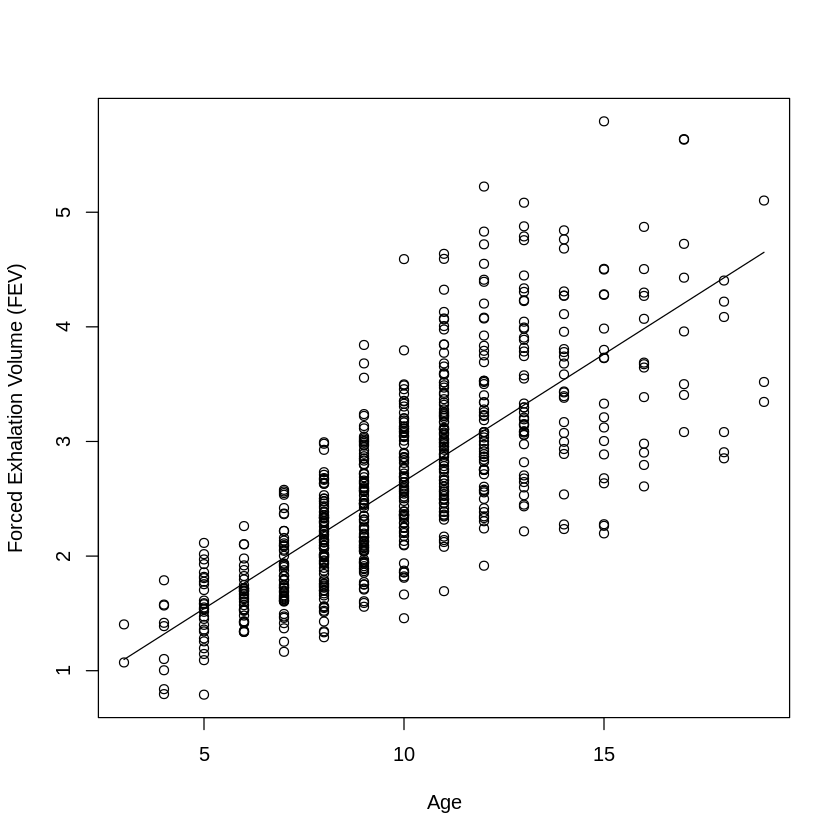

In [15]:
lungfunction <- read.table("fev_dat.txt", header=T)
attach(lungfunction)

model.1 <- lm(FEV ~ age, subset = age>=6 & age<=10)
summary(model.1)
# Coefficients:
#             Estimate Std. Error t value Pr(>|t|)
# (Intercept)  0.01165    0.15237   0.076    0.939
# age          0.26721    0.01801  14.839   <2e-16 ***

plot(age[age>=6 & age<=10], FEV[age>=6 & age<=10],
     xlab="Age", ylab="Forced Exhalation Volume (FEV)",
     panel.last = lines(sort(age[age>=6 & age<=10]),
                        fitted(model.1)[order(age[age>=6 & age<=10])]))

model.2 <- lm(FEV ~ age)
summary(model.2)
# Coefficients:
#             Estimate Std. Error t value Pr(>|t|)
# (Intercept) 0.431648   0.077895   5.541 4.36e-08 ***
# age         0.222041   0.007518  29.533  < 2e-16 ***

plot(age, FEV, xlab="Age", ylab="Forced Exhalation Volume (FEV)",
     panel.last = lines(sort(age), fitted(model.2)[order(age)]))
detach(lungfunction)